### Steps :
- Reading , understanding and visualizing the data
- Preparing the data for modeling ( Encoding, test train split, rescaling etc )
- Traning the model
- Residual analysis
- Prediction and evaluation of test set

## Step 1 : Reading, understanding and visualizing the data

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [297]:
#importing bike data
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [298]:
bike.shape

(730, 16)

In [299]:
#Getting information of data
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [300]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [301]:
#Statistical insight of data
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Visualize continuious variable

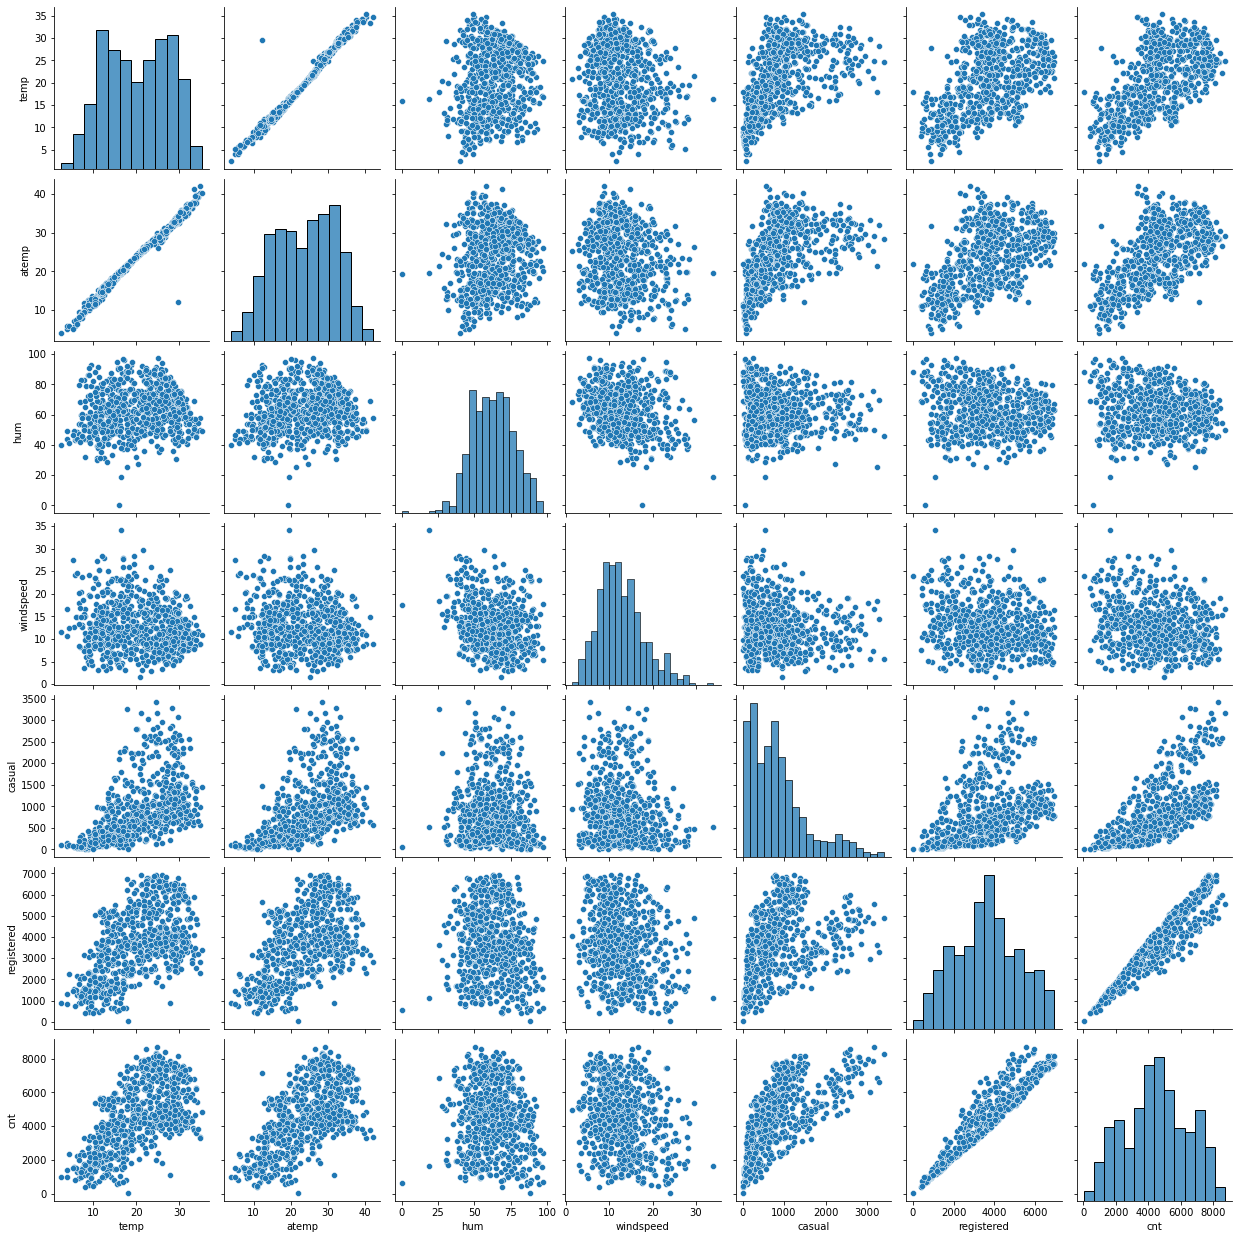

In [302]:
# We do not need instant as it is identity variable
varlist = ['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(bike[varlist])
plt.show()

#### Visualize  categorical variable

In [303]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


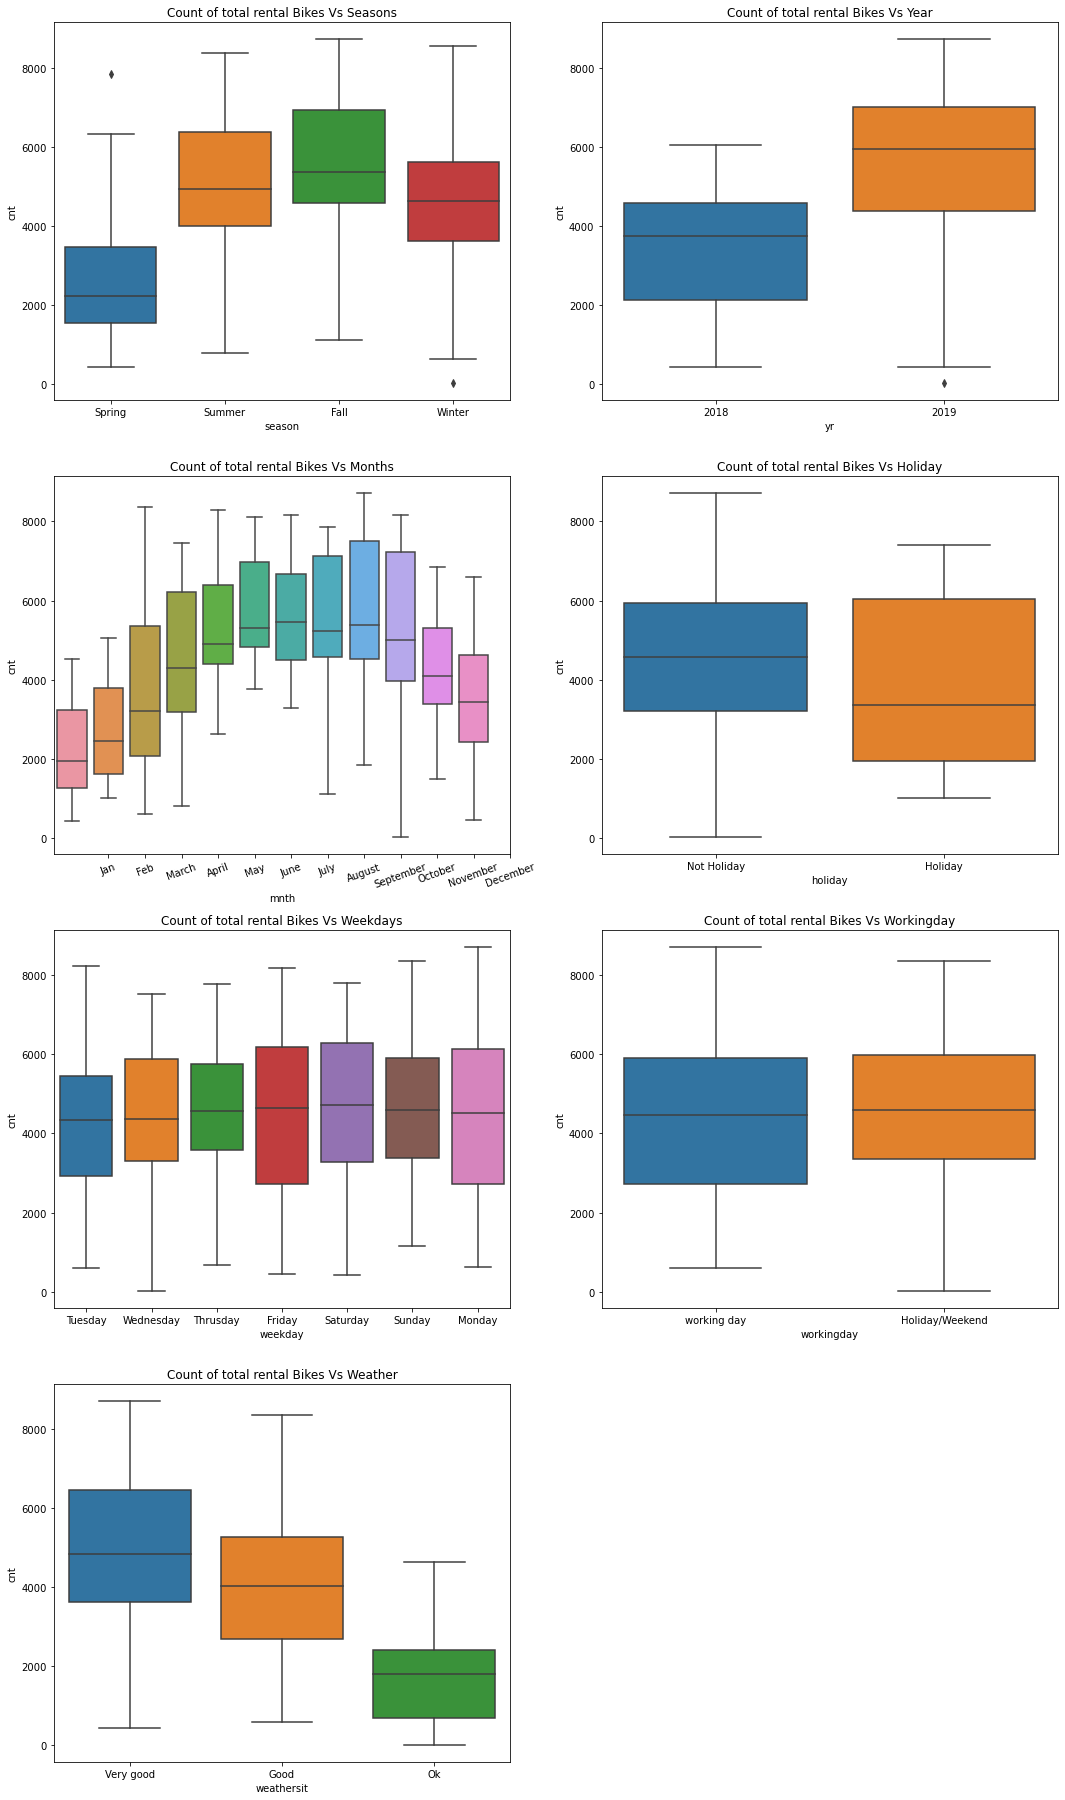

In [304]:
plt.figure(figsize=(18,32))
plt.subplot(4,2,1)
sns.boxplot(x='season',y='cnt', data=bike)
plt.title("Count of total rental Bikes Vs Seasons")
plt.xticks([0,1,2,3],['Spring','Summer','Fall','Winter'])


plt.subplot(4,2,2)
sns.boxplot(x='yr',y='cnt', data=bike)
plt.title("Count of total rental Bikes Vs Year")
plt.xticks([0,1],['2018','2019'])

plt.subplot(4,2,3)
sns.boxplot(x='mnth',y='cnt', data=bike)
plt.title("Count of total rental Bikes Vs Months")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','March','April', 'May','June','July','August','September','October','November','December'], rotation=20)

plt.subplot(4,2,4)
sns.boxplot(x='holiday',y='cnt', data=bike)
plt.title("Count of total rental Bikes Vs Holiday")
plt.xticks([0,1],['Not Holiday','Holiday'])

plt.subplot(4,2,5)
sns.boxplot(x='weekday',y='cnt', data=bike)
plt.title("Count of total rental Bikes Vs Weekdays")
plt.xticks([0,1,2,3,4,5,6],['Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday','Monday'])

plt.subplot(4,2,6)
sns.boxplot(x='workingday',y='cnt', data=bike)
plt.title("Count of total rental Bikes Vs Workingday")
plt.xticks([0,1],['working day','Holiday/Weekend'])

#Very Good => 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#Good => 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#Ok => 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#Bad =>  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

plt.subplot(4,2,7)
sns.boxplot(x='weathersit',y='cnt', data=bike)
plt.title("Count of total rental Bikes Vs Weather")
plt.xticks([0,1,2],['Very good','Good','Ok'])
plt.show()


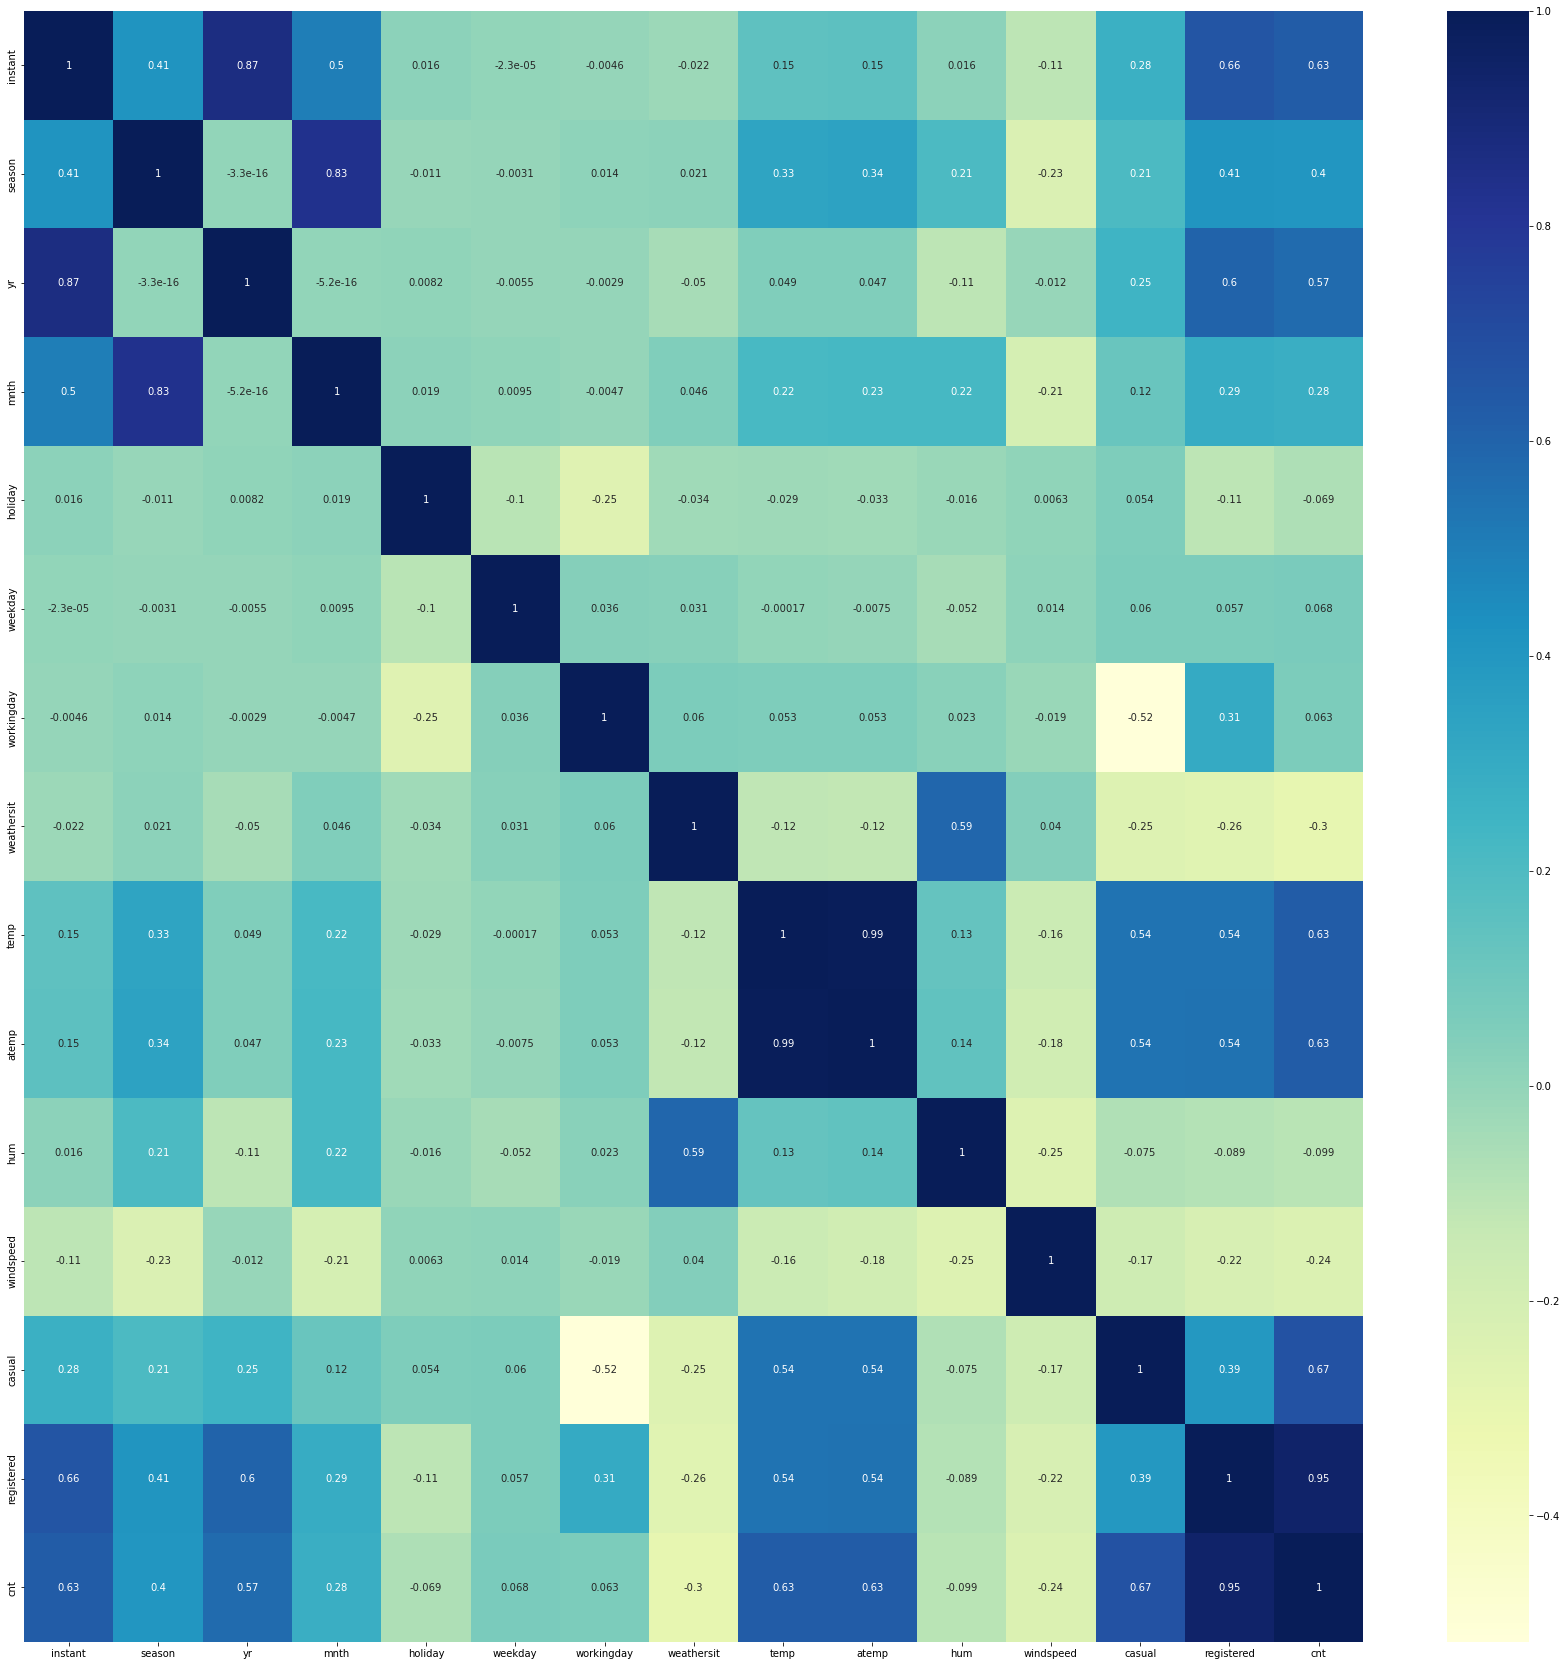

In [305]:
#Heatmap
plt.figure(figsize=(30,30))
sns.heatmap(bike.corr(), annot = True, cmap='YlGnBu')
plt.show()

### Step 2 : Preparing data for modeling ( Droping unnecessary columns, Encoding , test train split , Scalling )
- Droping columns 
    - Instant : Identity column. It will not contribute as predictor
    - dteday : We have month, day and year column as categorical columns. So we do not need dteday column
    - casual and registered : Cnt is the target variable and is sum of casual and registered variable. So casual and registered can be deleted
- Encoding :
    - Convert categorical variable to dummy variable
    - Convert yes/no to 1/0 if exists.
- Rescaling of variables

#### Dropping of columns

In [306]:
bike = bike.drop(['instant','dteday','casual','registered'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Encoding 

In [307]:
# Checking if holiday variable values. No need to convert.
bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [308]:
# Checking if workingday variable values. No need to convert.
bike.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [309]:
# 1:spring, 2:summer, 3:fall, 4:winter
bike.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [310]:
#different_seasons = pd.get_dummies(bike.season)
different_seasons = pd.get_dummies(bike.season, drop_first=True)
different_seasons.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [311]:
#Renaming columns
#different_seasons.columns = ['spring','summer','fall','winter']
different_seasons.columns = ['summer','fall','winter']
different_seasons.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [312]:
bike = pd.concat([bike,different_seasons], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [313]:
bike = bike.drop('season', axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [314]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [315]:
months = pd.get_dummies(bike.mnth, drop_first=True)
months.head()

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [316]:
months.columns = ['February','March','April','May','June','July','August','September','October','November','December']
months.head()

,February,March,April,May,June,July,August,September,October,November,December
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [317]:
bike = pd.concat([bike,months], axis=1)
bike.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,March,April,May,June,July,August,September,October,November,December
0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [318]:
bike = bike.drop('mnth', axis=1)
bike.head(2)

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,March,April,May,June,July,August,September,October,November,December
0,0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0


In [319]:
year = pd.get_dummies(bike.yr, drop_first=True)
year.columns = ['2019']
year.head(2)

,2019
0,0
1,0


In [320]:
bike = pd.concat([bike,year], axis=1)
bike = bike.drop('yr', axis=1)

In [321]:
bike.head(2)

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,April,May,June,July,August,September,October,November,December,2019
0,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,0,0,0,0,0


In [322]:
weekdays_details = pd.get_dummies(bike.weekday, drop_first=True)
weekdays_details.head(2)

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0


In [323]:
weekdays_details.columns =['Wednesday','Thrusday','Friday','Saturday','Sunday','Monday']
weekdays_details.head(2)

,Wednesday,Thrusday,Friday,Saturday,Sunday,Monday
0,0,0,0,0,0,1
1,0,0,0,0,0,0


In [324]:
bike=pd.concat([bike,weekdays_details], axis=1)
bike = bike.drop('weekday', axis=1)
bike.head(2)

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,...,October,November,December,2019,Wednesday,Thrusday,Friday,Saturday,Sunday,Monday
0,0,0,2,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
weather_details = pd.get_dummies(bike.weathersit, drop_first=True)
weather_details.head(2)

,2,3
0,1,0
1,1,0


In [326]:
weather_details.columns=['Weather_Good','Weather_OK']
weather_details.head(2)

,Weather_Good,Weather_OK
0,1,0
1,1,0


In [327]:
bike = pd.concat([bike, weather_details], axis=1)
bike = bike.drop('weathersit', axis=1)
bike.head(2)

,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,December,2019,Wednesday,Thrusday,Friday,Saturday,Sunday,Monday,Weather_Good,Weather_OK
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [328]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       730 non-null    int64  
 1   workingday    730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   summer        730 non-null    uint8  
 8   fall          730 non-null    uint8  
 9   winter        730 non-null    uint8  
 10  February      730 non-null    uint8  
 11  March         730 non-null    uint8  
 12  April         730 non-null    uint8  
 13  May           730 non-null    uint8  
 14  June          730 non-null    uint8  
 15  July          730 non-null    uint8  
 16  August        730 non-null    uint8  
 17  September     730 non-null    uint8  
 18  October       730 non-null    

#### test train split

In [329]:
bike_train, bike_test = train_test_split(bike, train_size=0.7, random_state=100)
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


#### Scaling : Minmax scaling ( normalizing data )

In [330]:
bike.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'summer', 'fall', 'winter', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       '2019', 'Wednesday', 'Thrusday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Weather_Good', 'Weather_OK'],
      dtype='object')

In [331]:
variable_to_be_scaled = ['temp','atemp','hum','windspeed']
scalar = MinMaxScaler()
bike_train[variable_to_be_scaled] = scalar.fit_transform(bike_train[variable_to_be_scaled])
bike_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,December,2019,Wednesday,Thrusday,Friday,Saturday,Sunday,Monday,Weather_Good,Weather_OK
576,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,1,0,...,0,1,0,1,0,0,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,0,...,0,1,0,0,0,0,0,1,1,0
728,0,0,0.245101,0.200348,0.498067,0.663106,1796,0,0,0,...,1,1,0,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,4220,1,0,0,...,0,1,0,0,0,0,0,1,1,0
111,0,1,0.345824,0.318819,0.751824,0.380981,1683,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [332]:
bike_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,December,2019,Wednesday,Thrusday,Friday,Saturday,Sunday,Monday,Weather_Good,Weather_OK
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,4485.337255,0.247059,0.262745,0.247059,...,0.084314,0.507843,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,1950.666077,0.431725,0.440557,0.431725,...,0.278131,0.500429,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,4530.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3 : Building model and train model

#### Deviding into X and Y set for model building

In [333]:
y_train = bike_train.pop('cnt')
X_train = bike_train

#### Building model

#### RFE : recursive feature elemeination

In [334]:
# importing RFE and Linearregression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [335]:
# Running RFE with the output number of variable equal to 20
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
#recursive_feature_elemeination = RFE(linear_model)
recursive_feature_elemeination = RFE(estimator=linear_model, n_features_to_select=20)
recursive_feature_elemeination = recursive_feature_elemeination.fit(X_train,y_train)

In [336]:
# See rank of the variables selected by RFE
list(zip(X_train.columns, recursive_feature_elemeination.support_, recursive_feature_elemeination.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('February', False, 2),
 ('March', True, 1),
 ('April', True, 1),
 ('May', True, 1),
 ('June', True, 1),
 ('July', False, 3),
 ('August', True, 1),
 ('September', True, 1),
 ('October', True, 1),
 ('November', False, 4),
 ('December', False, 5),
 ('2019', True, 1),
 ('Wednesday', False, 6),
 ('Thrusday', False, 7),
 ('Friday', False, 9),
 ('Saturday', False, 10),
 ('Sunday', False, 8),
 ('Monday', True, 1),
 ('Weather_Good', True, 1),
 ('Weather_OK', True, 1)]

In [337]:
# Checking selected feature by RFE
feature_selected_by_rfe = X_train.columns[recursive_feature_elemeination.support_]
feature_selected_by_rfe

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'March', 'April', 'May', 'June', 'August',
       'September', 'October', '2019', 'Monday', 'Weather_Good', 'Weather_OK'],
      dtype='object')

In [338]:
# Checking rejected features of RFE
X_train.columns[~recursive_feature_elemeination.support_]

Index(['February', 'July', 'November', 'December', 'Wednesday', 'Thrusday',
       'Friday', 'Saturday', 'Sunday'],
      dtype='object')

#### Building model using statsmodels for detailed statistics

In [339]:
# Creating X_train data frame with RFE selected variables
X_train_rfe = X_train[feature_selected_by_rfe]

In [340]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [341]:
linear_model = sm.OLS(y_train,X_train_rfe).fit()

In [342]:
#Summary of linear model
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     139.7
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.53e-187
Time:                        20:05:14   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     489   BIC:                             8334.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1680.0203    253.058      6.639   

#### From above summary we can see the few features have high p value whuch should be dropped


In [343]:
X_train_lm = X_train_rfe.drop(['atemp'], axis=1)
print(X_train_lm.columns)

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'March', 'April', 'May', 'June', 'August',
       'September', 'October', '2019', 'Monday', 'Weather_Good', 'Weather_OK'],
      dtype='object')


#### Rebuilding the model with new X_train

In [344]:
# Adding constant
X_train_lm = sm.add_constant(X_train_lm)

In [345]:
# Running linear model
linear_model = sm.OLS(y_train,X_train_lm).fit()

In [346]:
# See summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          1.29e-188
Time:                        20:05:14   Log-Likelihood:                -4101.3
No. Observations:                 510   AIC:                             8243.
Df Residuals:                     490   BIC:                             8327.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1682.8993    252.622      6.662   

#### From above details we can observe
    - Adjusted R-squared value is high which indicate good fit of model
    - No variable have significant high p-value.
    - All coefficients are significant

In [347]:
# Set of features considered
X_train_lm.columns

Index(['const', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'summer',
       'fall', 'winter', 'March', 'April', 'May', 'June', 'August',
       'September', 'October', '2019', 'Monday', 'Weather_Good', 'Weather_OK'],
      dtype='object')

In [348]:
# Lets calculate VIF for the model 
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_vif = X_train_lm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
2,temp,29.25
3,hum,17.98
6,fall,9.03
5,summer,7.47
1,workingday,5.10
4,windspeed,4.13
10,May,3.74
9,April,3.33
7,winter,3.22
11,June,2.51


#### VIF is showing multicolinearity still exist . So need to drop the columns hum, temp ans workingday

In [349]:
X_train_lm = X_train_lm.drop(['hum','temp', 'fall','summer'], axis=1)
print(X_train_lm.columns)

Index(['const', 'holiday', 'workingday', 'windspeed', 'winter', 'March',
       'April', 'May', 'June', 'August', 'September', 'October', '2019',
       'Monday', 'Weather_Good', 'Weather_OK'],
      dtype='object')


In [350]:
# Adding a constant
X_train_lm = sm.add_constant(X_train_lm)

In [351]:
# Running linear model
linear_model = sm.OLS(y_train,X_train_lm).fit()

In [352]:
# See summary
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     79.42
Date:                Tue, 11 Oct 2022   Prob (F-statistic):          5.17e-121
Time:                        20:05:14   Log-Likelihood:                -4274.0
No. Observations:                 510   AIC:                             8580.
Df Residuals:                     494   BIC:                             8648.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2864.7323    184.151     15.556   

In [353]:
# Lets calculate VIF for the model again
X_train_vif = X_train_lm.drop(['const'],axis=1)

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
1,workingday,3.72
2,windspeed,3.63
3,winter,2.11
11,2019,1.93
12,Monday,1.65
10,October,1.56
13,Weather_Good,1.55
4,March,1.35
5,April,1.30
8,August,1.29


#### From above VIF , we can confirm that no significant multicollinearity exists

### Step 4 : Residual Analysis
    - Check : error term are normally distributed ? Let's plot histogram of error terms

In [354]:
y_train_count = linear_model.predict(X_train_lm)

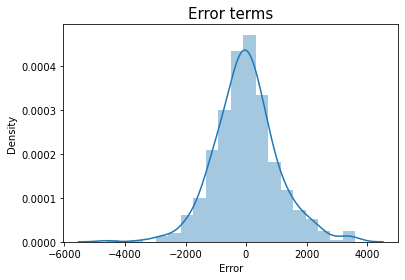

In [355]:
sns.distplot((y_train - y_train_count), bins = 20)
plt.title("Error terms", fontsize=15)
plt.xlabel("Error")
plt.show()

#### Error terms are normally distributed

### Step 5 : Prediction and evaluation of test set

#### Appling scaling on test set

In [356]:
variable_to_be_scaled_test_set = ['temp','atemp','hum','windspeed']
bike_test[variable_to_be_scaled_test_set] = scalar.transform(bike_test[variable_to_be_scaled])
bike_test.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,...,December,2019,Wednesday,Thrusday,Friday,Saturday,Sunday,Monday,Weather_Good,Weather_OK
184,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,0,1,0.901354,0.842587,0.610133,0.153728,6211,1,0,0,...,0,1,0,0,1,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,2659,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,4968,1,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Deviding into X_test and y_test

In [357]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [358]:
#Creating X_test_new dataframe by dropping variables from X_test
X_train_lm = X_train_lm.drop(['const'], axis=1)
X_test_new = X_test[X_train_lm.columns]


print(X_test_new.columns)

# Adding a constant
X_test_new = sm.add_constant(X_test_new)


Index(['holiday', 'workingday', 'windspeed', 'winter', 'March', 'April', 'May',
       'June', 'August', 'September', 'October', '2019', 'Monday',
       'Weather_Good', 'Weather_OK'],
      dtype='object')


In [359]:
# Making prediction
y_pred = linear_model.predict(X_test_new)

### Model evaluation

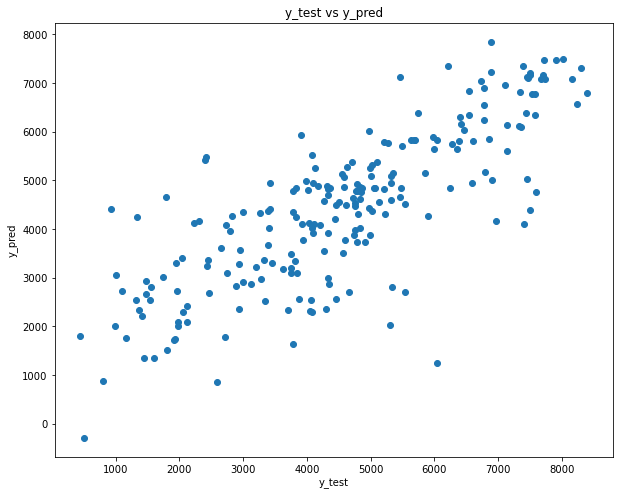

In [360]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel('y_pred')
plt.show()

In [361]:
from sklearn.metrics import r2_score
r2_score ( y_true=y_test, y_pred = y_pred)

0.6226282983030289

#### R-squared from test data set is 0.6226 where from train data it is 0.698. 